In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
import matplotlib.pyplot as plt

# Load Data

In [2]:
gr = pd.read_csv('official_goodreads_metadata.csv')
am = pd.read_csv('official_amazon_metadata.csv')
am_gr = pd.merge(gr[['asin', 'average_rating', 'total_ratings_count', 'total_text_reviews_count', 'publication_year', 
                     'publication_month', 'publication_day', 'num_pages', 'format', 'cleaned_description', 'gr_countDes_before', 
                     'gr_countDes_after', 'cleaned_genres', 'gr_countText_before', 'gr_countText_after']], 
                 am[['asin', 'average', 'rating_count', 'text_reviews_count', 'rank', 'verifiedTrue_count', 'Format',
                     'am_countText_before', 'am_countText_after']], how='inner', on='asin')

In [3]:
am_gr = am_gr.rename(columns={'average_rating':'gr_average', 'total_ratings_count':'gr_ratings_count',
                              'total_text_reviews_count':'gr_reviews_count', 'publication_year':'gr_pub_yr', 
                              'publication_month':'gr_pub_mo', 'publication_day':'gr_pub_day', 'num_pages':'gr_num_pages', 
                              'format':'gr_format', 'cleaned_description':'gr_description', 'cleaned_genres':'gr_genres',
                              'average':'am_average', 'rating_count':'am_ratings_count', 'text_reviews_count':'am_reviews_count', 
                              'rank':'am_rank', 'verifiedTrue_count':'am_verifiedTrue_count', 'Format':'am_format'})

In [4]:
col_names=["asin", "prop_topic_1", "prop_topic_2", "prop_topic_3", "prop_topic_4", 'prop_topic_5', 'prop_topic_6', 
                   'prop_topic_7', 'prop_topic_8', 'prop_topic_9', 'prop_topic_10','prop_topic_11', 'prop_topic_12',
                   'prop_topic_13','prop_topic_14','prop_topic_15','prop_topic_16','prop_topic_17', 'prop_topic_18',
                   'prop_topic_19','prop_topic_20','prop_topic_21','prop_topic_22','prop_topic_23', 'prop_topic_24',
                   'prop_topic_25','prop_topic_26','prop_topic_27','prop_topic_28','prop_topic_29','prop_topic_30', 
                   'prop_topic_31','prop_topic_32','prop_topic_33','prop_topic_34','prop_topic_35','delete']
lda_mallet = pd.read_csv('am_gr_LDA_wmallet_step5_metadata.csv', names=col_names)
lda_mallet = lda_mallet.drop('delete', axis=1)
lda_mallet

,asin,prop_topic_1,prop_topic_2,prop_topic_3,prop_topic_4,prop_topic_5,prop_topic_6,prop_topic_7,prop_topic_8,prop_topic_9,...,prop_topic_26,prop_topic_27,prop_topic_28,prop_topic_29,prop_topic_30,prop_topic_31,prop_topic_32,prop_topic_33,prop_topic_34,prop_topic_35
0,0001713353,0.002965,0.006142,0.003064,0.009717,0.007532,0.002567,0.012497,0.037718,0.004156,...,0.004156,0.008128,0.003163,0.622665,0.006241,0.032852,0.011305,0.002270,0.013093,0.016568
1,0001061240,0.002599,0.004051,0.002987,0.092998,0.006955,0.003470,0.003761,0.022731,0.036765,...,0.003954,0.004148,0.006761,0.623002,0.002890,0.006568,0.007148,0.007536,0.005116,0.008794
2,0001711296,0.002122,0.004148,0.004668,0.009395,0.006226,0.003888,0.003317,0.032458,0.008616,...,0.003992,0.062327,0.009966,0.601987,0.002694,0.005447,0.009343,0.025809,0.016875,0.015836
3,0002007649,0.001322,0.006238,0.002341,0.003492,0.004599,0.004865,0.019789,0.005529,0.002828,...,0.274915,0.002385,0.002075,0.001809,0.001411,0.337888,0.001367,0.006681,0.001809,0.009116
4,0001716069,0.003595,0.008401,0.004867,0.016812,0.004443,0.005715,0.011723,0.022608,0.010097,...,0.006563,0.012995,0.004019,0.559928,0.005927,0.005927,0.002534,0.042893,0.005432,0.005291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37228,0312943636,0.054864,0.071713,0.004150,0.001990,0.075107,0.003105,0.009655,0.006072,0.008445,...,0.001468,0.052871,0.001587,0.078240,0.143857,0.003580,0.001112,0.000898,0.002227,0.002560
37229,0312953038,0.023256,0.059585,0.004397,0.003417,0.018439,0.001703,0.014683,0.008479,0.003580,...,0.002193,0.075995,0.007499,0.005458,0.013785,0.003254,0.002193,0.005377,0.002519,0.004723
37230,0312955154,0.005746,0.007264,0.039596,0.018800,0.007720,0.003773,0.008479,0.007112,0.007112,...,0.100160,0.268800,0.004987,0.023506,0.147368,0.007112,0.010604,0.004987,0.006202,0.006809
37231,0312956878,0.007011,0.423280,0.020872,0.021554,0.008602,0.006103,0.007239,0.012919,0.033596,...,0.020417,0.020190,0.009056,0.018145,0.022690,0.008375,0.006557,0.017464,0.014510,0.032687


# Clean Data

In [5]:
am_gr.describe()

,gr_average,gr_ratings_count,gr_reviews_count,gr_pub_yr,gr_pub_mo,gr_pub_day,gr_num_pages,gr_countDes_before,gr_countDes_after,gr_countText_before,gr_countText_after,am_average,am_ratings_count,am_reviews_count,am_rank,am_verifiedTrue_count,am_countText_before,am_countText_after
count,37233.000000,3.723300e+04,37233.000000,35788.000000,35221.000000,35021.000000,35603.000000,36206.000000,35485.000000,3.723300e+04,37233.000000,37233.000000,37233.000000,37233.000000,3.723300e+04,37233.000000,3.723300e+04,3.723300e+04
mean,3.873311,1.147746e+04,614.953992,2005.668772,6.367764,13.958339,322.277757,160.689085,89.978442,3.233221e+03,1429.169957,4.261219,152.651680,152.615798,1.563020e+06,104.396879,1.371004e+04,6.490044e+03
std,0.306148,8.537788e+04,3121.161743,8.987800,3.339121,10.365574,201.544695,92.759441,52.634720,1.502964e+04,6492.465045,0.422799,702.459338,702.255076,2.092905e+06,569.410575,4.245893e+04,1.970582e+04
min,2.320000,1.000000e+00,0.000000,1900.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000e+00,0.000000,1.080000,6.000000,6.000000,2.300000e+01,0.000000,7.900000e+01,4.900000e+01
25%,3.690000,2.270000e+02,27.000000,2002.000000,4.000000,4.000000,227.000000,99.000000,55.000000,1.480000e+02,68.000000,4.040000,22.000000,22.000000,3.022940e+05,11.000000,2.395000e+03,1.152000e+03
50%,3.890000,8.210000e+02,83.000000,2008.000000,6.000000,13.000000,307.000000,147.000000,81.000000,5.740000e+02,260.000000,4.330000,43.000000,43.000000,9.232760e+05,24.000000,4.956000e+03,2.387000e+03
75%,4.080000,3.416000e+03,292.000000,2012.000000,9.000000,24.000000,384.000000,205.000000,115.000000,2.058000e+03,928.000000,4.570000,107.000000,107.000000,1.986080e+06,66.000000,1.170400e+04,5.585000e+03
max,5.000000,4.718437e+06,152766.000000,2019.000000,12.000000,31.000000,9998.000000,2124.000000,1250.000000,1.001655e+06,443150.000000,5.000000,44956.000000,44947.000000,2.154444e+07,39851.000000,2.384912e+06,1.082212e+06


In [6]:
gr[gr['total_text_reviews_count'] == 0]

,asin,average_rating,ratings_count,reviews_count,text_reviews_count,total_ratings_count,total_reviews_count,total_text_reviews_count,publication_year,publication_month,...,publisher,num_pages,format,description,cleaned_description,gr_countDes_before,gr_countDes_after,cleaned_genres,gr_countText_before,gr_countText_after
24788,0205739415,2.92,8,32,0,12,46,0,2010.0,9.0,...,Longman Publishing Group,544.0,Paperback,"""Technical Communication Strategies for Today ...",technical communication strategy today offer s...,147.0,92.0,non-fiction,96,40
26677,0300084323,4.35,23,86,0,23,86,0,2001.0,3.0,...,Yale University Press,816.0,Hardcover,The Holocaust has been the subject of countles...,holocaust subject countless book work art memo...,214.0,134.0,"history, historical fiction, biography, fictio...",2,2


In [7]:
am_gr.loc[am_gr['asin'] == '0205739415', 'gr_reviews_count'] = 32
am_gr.loc[am_gr['asin'] == '0300084323', 'gr_reviews_count'] = 86

In [8]:
am_gr.describe()

,gr_average,gr_ratings_count,gr_reviews_count,gr_pub_yr,gr_pub_mo,gr_pub_day,gr_num_pages,gr_countDes_before,gr_countDes_after,gr_countText_before,gr_countText_after,am_average,am_ratings_count,am_reviews_count,am_rank,am_verifiedTrue_count,am_countText_before,am_countText_after
count,37233.000000,3.723300e+04,37233.000000,35788.000000,35221.000000,35021.000000,35603.000000,36206.000000,35485.000000,3.723300e+04,37233.000000,37233.000000,37233.000000,37233.000000,3.723300e+04,37233.000000,3.723300e+04,3.723300e+04
mean,3.873311,1.147746e+04,614.957162,2005.668772,6.367764,13.958339,322.277757,160.689085,89.978442,3.233221e+03,1429.169957,4.261219,152.651680,152.615798,1.563020e+06,104.396879,1.371004e+04,6.490044e+03
std,0.306148,8.537788e+04,3121.161155,8.987800,3.339121,10.365574,201.544695,92.759441,52.634720,1.502964e+04,6492.465045,0.422799,702.459338,702.255076,2.092905e+06,569.410575,4.245893e+04,1.970582e+04
min,2.320000,1.000000e+00,1.000000,1900.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000e+00,0.000000,1.080000,6.000000,6.000000,2.300000e+01,0.000000,7.900000e+01,4.900000e+01
25%,3.690000,2.270000e+02,27.000000,2002.000000,4.000000,4.000000,227.000000,99.000000,55.000000,1.480000e+02,68.000000,4.040000,22.000000,22.000000,3.022940e+05,11.000000,2.395000e+03,1.152000e+03
50%,3.890000,8.210000e+02,83.000000,2008.000000,6.000000,13.000000,307.000000,147.000000,81.000000,5.740000e+02,260.000000,4.330000,43.000000,43.000000,9.232760e+05,24.000000,4.956000e+03,2.387000e+03
75%,4.080000,3.416000e+03,292.000000,2012.000000,9.000000,24.000000,384.000000,205.000000,115.000000,2.058000e+03,928.000000,4.570000,107.000000,107.000000,1.986080e+06,66.000000,1.170400e+04,5.585000e+03
max,5.000000,4.718437e+06,152766.000000,2019.000000,12.000000,31.000000,9998.000000,2124.000000,1250.000000,1.001655e+06,443150.000000,5.000000,44956.000000,44947.000000,2.154444e+07,39851.000000,2.384912e+06,1.082212e+06


In [9]:
am_gr['gr_num_pages'] = am_gr['gr_num_pages'].replace(0, np.mean(am_gr['gr_num_pages']))

In [10]:
am_gr.describe()

,gr_average,gr_ratings_count,gr_reviews_count,gr_pub_yr,gr_pub_mo,gr_pub_day,gr_num_pages,gr_countDes_before,gr_countDes_after,gr_countText_before,gr_countText_after,am_average,am_ratings_count,am_reviews_count,am_rank,am_verifiedTrue_count,am_countText_before,am_countText_after
count,37233.000000,3.723300e+04,37233.000000,35788.000000,35221.000000,35021.000000,35603.000000,36206.000000,35485.000000,3.723300e+04,37233.000000,37233.000000,37233.000000,37233.000000,3.723300e+04,37233.000000,3.723300e+04,3.723300e+04
mean,3.873311,1.147746e+04,614.957162,2005.668772,6.367764,13.958339,323.246320,160.689085,89.978442,3.233221e+03,1429.169957,4.261219,152.651680,152.615798,1.563020e+06,104.396879,1.371004e+04,6.490044e+03
std,0.306148,8.537788e+04,3121.161155,8.987800,3.339121,10.365574,200.766459,92.759441,52.634720,1.502964e+04,6492.465045,0.422799,702.459338,702.255076,2.092905e+06,569.410575,4.245893e+04,1.970582e+04
min,2.320000,1.000000e+00,1.000000,1900.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,0.000000,1.080000,6.000000,6.000000,2.300000e+01,0.000000,7.900000e+01,4.900000e+01
25%,3.690000,2.270000e+02,27.000000,2002.000000,4.000000,4.000000,229.000000,99.000000,55.000000,1.480000e+02,68.000000,4.040000,22.000000,22.000000,3.022940e+05,11.000000,2.395000e+03,1.152000e+03
50%,3.890000,8.210000e+02,83.000000,2008.000000,6.000000,13.000000,308.000000,147.000000,81.000000,5.740000e+02,260.000000,4.330000,43.000000,43.000000,9.232760e+05,24.000000,4.956000e+03,2.387000e+03
75%,4.080000,3.416000e+03,292.000000,2012.000000,9.000000,24.000000,384.000000,205.000000,115.000000,2.058000e+03,928.000000,4.570000,107.000000,107.000000,1.986080e+06,66.000000,1.170400e+04,5.585000e+03
max,5.000000,4.718437e+06,152766.000000,2019.000000,12.000000,31.000000,9998.000000,2124.000000,1250.000000,1.001655e+06,443150.000000,5.000000,44956.000000,44947.000000,2.154444e+07,39851.000000,2.384912e+06,1.082212e+06


In [11]:
am_gr['ratings_count'] = am_gr['gr_ratings_count'] + am_gr['am_ratings_count']
am_gr['reviews_count'] = am_gr['gr_reviews_count'] + am_gr['am_reviews_count']
am_gr['rating_diff'] = am_gr['am_average'] - am_gr['gr_average']
am_gr = am_gr.drop(['gr_ratings_count', 'am_ratings_count', 'gr_reviews_count', 'am_reviews_count', 'am_average', 'gr_average'],
                   axis=1)

In [12]:
am_gr.isnull().sum()

asin                        0
gr_pub_yr                1445
gr_pub_mo                2012
gr_pub_day               2212
gr_num_pages             1630
gr_format                1535
gr_description           1748
gr_countDes_before       1027
gr_countDes_after        1748
gr_genres                 199
gr_countText_before         0
gr_countText_after          0
am_rank                     0
am_verifiedTrue_count       0
am_format                  49
am_countText_before         0
am_countText_after          0
ratings_count               0
reviews_count               0
rating_diff                 0
dtype: int64

In [13]:
lda_mallet = pd.merge(lda_mallet, am_gr, on='asin', how='inner')
lda_mallet

,asin,prop_topic_1,prop_topic_2,prop_topic_3,prop_topic_4,prop_topic_5,prop_topic_6,prop_topic_7,prop_topic_8,prop_topic_9,...,gr_countText_before,gr_countText_after,am_rank,am_verifiedTrue_count,am_format,am_countText_before,am_countText_after,ratings_count,reviews_count,rating_diff
0,0001713353,0.002965,0.006142,0.003064,0.009717,0.007532,0.002567,0.012497,0.037718,0.004156,...,600,268,1461315,36,"Paperback, Hardcover",2362,1037,691,109,0.56
1,0001061240,0.002599,0.004051,0.002987,0.092998,0.006955,0.003470,0.003761,0.022731,0.036765,...,49,18,321557,30,Hardcover,3085,1326,266,81,0.25
2,0001711296,0.002122,0.004148,0.004668,0.009395,0.006226,0.003888,0.003317,0.032458,0.008616,...,257,117,2884610,69,"Library Binding, VHS Tape, Paperback, Hard...",5667,2574,845,172,0.15
3,0002007649,0.001322,0.006238,0.002341,0.003492,0.004599,0.004865,0.019789,0.005529,0.002828,...,356,166,9799524,3,"Kindle Edition, Paperback, Hardcover",5668,2810,375,60,-0.20
4,0001716069,0.003595,0.008401,0.004867,0.016812,0.004443,0.005715,0.011723,0.022608,0.010097,...,1090,509,3841172,44,"Kindle Edition, Paperback, Hardcover",3081,1457,1618,161,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37228,0312943636,0.054864,0.071713,0.004150,0.001990,0.075107,0.003105,0.009655,0.006072,0.008445,...,7453,3353,2583900,9,"Mass Market Paperback, Kindle Edition",5228,2508,1819,158,0.44
37229,0312953038,0.023256,0.059585,0.004397,0.003417,0.018439,0.001703,0.014683,0.008479,0.003580,...,451,210,553268,12,"Mass Market Paperback, Kindle Edition, Pape...",3184,1420,1155,86,0.25
37230,0312955154,0.005746,0.007264,0.039596,0.018800,0.007720,0.003773,0.008479,0.007112,0.007112,...,362,184,3412599,4,"Kindle Edition, Paperback",1456,683,70,19,-0.07
37231,0312956878,0.007011,0.423280,0.020872,0.021554,0.008602,0.006103,0.007239,0.012919,0.033596,...,152,76,2606128,9,"Mass Market Paperback, Hardcover",968,450,74,19,-0.45


### Removing some outliers

In [14]:
q = lda_mallet['rating_diff'].quantile(0.02)
lda_mallet =lda_mallet[lda_mallet['rating_diff']>q]
q = lda_mallet['rating_diff'].quantile(0.98)
lda_mallet=lda_mallet[lda_mallet['rating_diff']<q]
lda_mallet

,asin,prop_topic_1,prop_topic_2,prop_topic_3,prop_topic_4,prop_topic_5,prop_topic_6,prop_topic_7,prop_topic_8,prop_topic_9,...,gr_countText_before,gr_countText_after,am_rank,am_verifiedTrue_count,am_format,am_countText_before,am_countText_after,ratings_count,reviews_count,rating_diff
0,0001713353,0.002965,0.006142,0.003064,0.009717,0.007532,0.002567,0.012497,0.037718,0.004156,...,600,268,1461315,36,"Paperback, Hardcover",2362,1037,691,109,0.56
1,0001061240,0.002599,0.004051,0.002987,0.092998,0.006955,0.003470,0.003761,0.022731,0.036765,...,49,18,321557,30,Hardcover,3085,1326,266,81,0.25
2,0001711296,0.002122,0.004148,0.004668,0.009395,0.006226,0.003888,0.003317,0.032458,0.008616,...,257,117,2884610,69,"Library Binding, VHS Tape, Paperback, Hard...",5667,2574,845,172,0.15
3,0002007649,0.001322,0.006238,0.002341,0.003492,0.004599,0.004865,0.019789,0.005529,0.002828,...,356,166,9799524,3,"Kindle Edition, Paperback, Hardcover",5668,2810,375,60,-0.20
4,0001716069,0.003595,0.008401,0.004867,0.016812,0.004443,0.005715,0.011723,0.022608,0.010097,...,1090,509,3841172,44,"Kindle Edition, Paperback, Hardcover",3081,1457,1618,161,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37226,0312956959,0.015414,0.004934,0.034289,0.023690,0.004041,0.003386,0.004636,0.006184,0.033515,...,137,72,2880300,26,"Kindle Edition, Paperback, Hardcover",4356,2184,422,111,0.56
37227,0312952813,0.000506,0.032636,0.012373,0.004216,0.110600,0.000267,0.002497,0.001451,0.007286,...,141,66,199646,1249,"Kindle Edition, Audio Cassette, MP3 CD, Au...",68617,34328,60270,3735,0.36
37228,0312943636,0.054864,0.071713,0.004150,0.001990,0.075107,0.003105,0.009655,0.006072,0.008445,...,7453,3353,2583900,9,"Mass Market Paperback, Kindle Edition",5228,2508,1819,158,0.44
37229,0312953038,0.023256,0.059585,0.004397,0.003417,0.018439,0.001703,0.014683,0.008479,0.003580,...,451,210,553268,12,"Mass Market Paperback, Kindle Edition, Pape...",3184,1420,1155,86,0.25


# Random Forest

### RF mallet

In [15]:
rf_mallet = lda_mallet.drop(['gr_format', 'gr_description', 'gr_genres', 'am_format'], axis=1) 
rf_mallet.isnull().sum()

asin                        0
prop_topic_1                0
prop_topic_2                0
prop_topic_3                0
prop_topic_4                0
prop_topic_5                0
prop_topic_6                0
prop_topic_7                0
prop_topic_8                0
prop_topic_9                0
prop_topic_10               0
prop_topic_11               0
prop_topic_12               0
prop_topic_13               0
prop_topic_14               0
prop_topic_15               0
prop_topic_16               0
prop_topic_17               0
prop_topic_18               0
prop_topic_19               0
prop_topic_20               0
prop_topic_21               0
prop_topic_22               0
prop_topic_23               0
prop_topic_24               0
prop_topic_25               0
prop_topic_26               0
prop_topic_27               0
prop_topic_28               0
prop_topic_29               0
prop_topic_30               0
prop_topic_31               0
prop_topic_32               0
prop_topic

In [16]:
rf_mallet = rf_mallet.dropna()
rf_mallet.isnull().sum()

asin                     0
prop_topic_1             0
prop_topic_2             0
prop_topic_3             0
prop_topic_4             0
prop_topic_5             0
prop_topic_6             0
prop_topic_7             0
prop_topic_8             0
prop_topic_9             0
prop_topic_10            0
prop_topic_11            0
prop_topic_12            0
prop_topic_13            0
prop_topic_14            0
prop_topic_15            0
prop_topic_16            0
prop_topic_17            0
prop_topic_18            0
prop_topic_19            0
prop_topic_20            0
prop_topic_21            0
prop_topic_22            0
prop_topic_23            0
prop_topic_24            0
prop_topic_25            0
prop_topic_26            0
prop_topic_27            0
prop_topic_28            0
prop_topic_29            0
prop_topic_30            0
prop_topic_31            0
prop_topic_32            0
prop_topic_33            0
prop_topic_34            0
prop_topic_35            0
gr_pub_yr                0
g

In [17]:
am_gr['gr_genres'] = am_gr['gr_genres'].str.replace(' ','')
genres = pd.get_dummies(am_gr['gr_genres'].str.get_dummies(sep=','))
genres.astype('int8')
genres = pd.concat([genres, am_gr['asin']], axis=1)
rf_mallet = pd.merge(rf_mallet, genres, how='left', on='asin')
rf_mallet

,asin,prop_topic_1,prop_topic_2,prop_topic_3,prop_topic_4,prop_topic_5,prop_topic_6,prop_topic_7,prop_topic_8,prop_topic_9,...,graphic,historicalfiction,history,mystery,non-fiction,paranormal,poetry,romance,thriller,young-adult
0,0001713353,0.002965,0.006142,0.003064,0.009717,0.007532,0.002567,0.012497,0.037718,0.004156,...,0,0,0,0,0,0,0,0,0,0
1,0002007649,0.001322,0.006238,0.002341,0.003492,0.004599,0.004865,0.019789,0.005529,0.002828,...,0,0,0,0,1,0,0,0,0,0
2,0001716069,0.003595,0.008401,0.004867,0.016812,0.004443,0.005715,0.011723,0.022608,0.010097,...,0,0,0,0,0,0,1,0,0,1
3,0001841572,0.004595,0.012215,0.006101,0.039328,0.011683,0.012569,0.006810,0.007076,0.186502,...,0,1,1,0,0,1,0,0,0,1
4,0001983008,0.008206,0.005634,0.010435,0.027239,0.021409,0.003405,0.013007,0.012664,0.005805,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32089,0312945833,0.004710,0.060439,0.003602,0.002060,0.087109,0.000562,0.002820,0.002994,0.002451,...,0,0,0,1,0,0,0,1,1,0
32090,0312956959,0.015414,0.004934,0.034289,0.023690,0.004041,0.003386,0.004636,0.006184,0.033515,...,0,1,1,1,0,1,0,0,1,0
32091,0312952813,0.000506,0.032636,0.012373,0.004216,0.110600,0.000267,0.002497,0.001451,0.007286,...,0,0,0,1,0,0,0,0,1,0
32092,0312943636,0.054864,0.071713,0.004150,0.001990,0.075107,0.003105,0.009655,0.006072,0.008445,...,0,0,0,1,0,1,0,1,1,0


In [20]:
y = np.array(rf_mallet['rating_diff'])
x = rf_mallet.drop('asin', axis=1).drop('rating_diff', axis=1)

features = list(x.columns)

x = np.array(x)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Train the model on training data
rf = RandomForestRegressor(n_estimators = 1155, min_samples_split = 35, min_samples_leaf = 3, max_leaf_nodes = 7000,
                           max_features = 'auto', max_depth = 30, bootstrap = True, n_jobs=4)
rf.fit(x_train, y_train)

# Use the forest's predict method on the train data
predictions = rf.predict(x_train)
print('TRAIN DATA:')
print('Mean Absolute Error:', np.round(mean_absolute_error(y_train, predictions),4))
print('Mean Squared Error:', np.round(mean_squared_error(y_train, predictions),4))
print('Root Mean Squared Error:', np.round(np.sqrt(mean_squared_error(y_train, predictions)),4))
r2 = rf.score(x_train, y_train)
n = x_train.shape[0]
p = x_train.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('R2 Adjusted Score:', np.round(adjusted_r2,4))

print('----------------------------------')

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
print('TEST DATA:')
print('Mean Absolute Error:', np.round(mean_absolute_error(y_test, predictions),4))
print('Mean Squared Error:', np.round(mean_squared_error(y_test, predictions),4))
print('Root Mean Squared Error:', np.round(np.sqrt(mean_squared_error(y_test, predictions)),4))
r2 = rf.score(x_test, y_test)
n = x_test.shape[0]
p = x_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('R2 Adjusted Score:', np.round(adjusted_r2,4))

TRAIN DATA:
Mean Absolute Error: 0.1357
Mean Squared Error: 0.0315
Root Mean Squared Error: 0.1775
R2 Adjusted Score: 0.5883
----------------------------------
TEST DATA:
Mean Absolute Error: 0.1859
Mean Squared Error: 0.0574
Root Mean Squared Error: 0.2397
R2 Adjusted Score: 0.2199


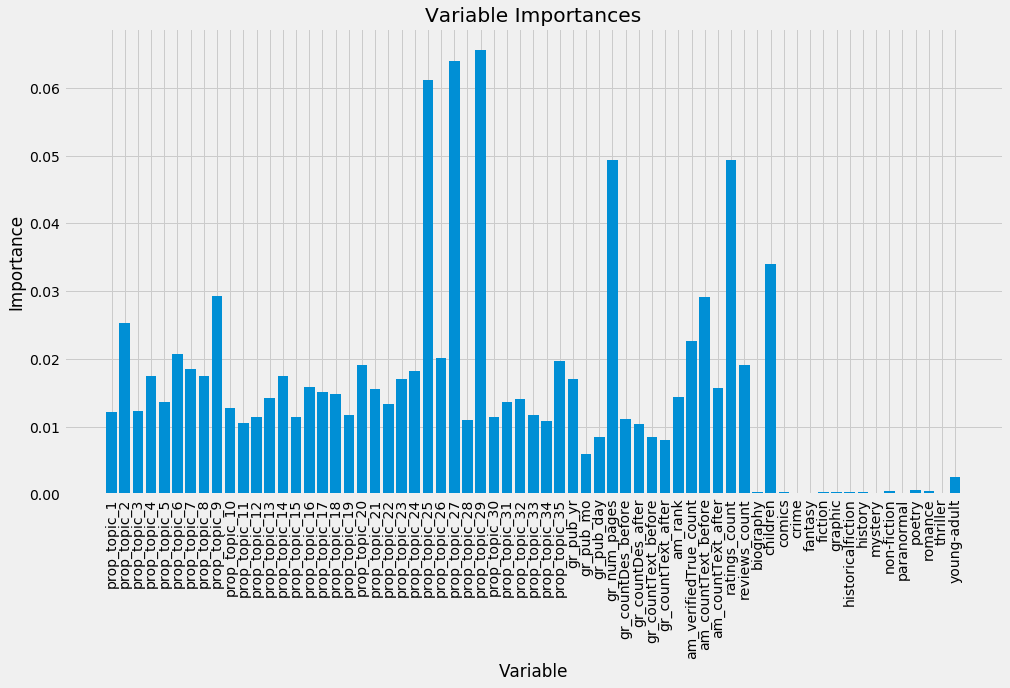

In [25]:
importances = list(rf.feature_importances_)

# Set the style
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 8))
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances')
plt.show()

Verdict: Better than the model w/o LDA

### RF mallet w/ Children

In [26]:
rf_mallet.columns

Index(['asin', 'prop_topic_1', 'prop_topic_2', 'prop_topic_3', 'prop_topic_4',
       'prop_topic_5', 'prop_topic_6', 'prop_topic_7', 'prop_topic_8',
       'prop_topic_9', 'prop_topic_10', 'prop_topic_11', 'prop_topic_12',
       'prop_topic_13', 'prop_topic_14', 'prop_topic_15', 'prop_topic_16',
       'prop_topic_17', 'prop_topic_18', 'prop_topic_19', 'prop_topic_20',
       'prop_topic_21', 'prop_topic_22', 'prop_topic_23', 'prop_topic_24',
       'prop_topic_25', 'prop_topic_26', 'prop_topic_27', 'prop_topic_28',
       'prop_topic_29', 'prop_topic_30', 'prop_topic_31', 'prop_topic_32',
       'prop_topic_33', 'prop_topic_34', 'prop_topic_35', 'gr_pub_yr',
       'gr_pub_mo', 'gr_pub_day', 'gr_num_pages', 'gr_countDes_before',
       'gr_countDes_after', 'gr_countText_before', 'gr_countText_after',
       'am_rank', 'am_verifiedTrue_count', 'am_countText_before',
       'am_countText_after', 'ratings_count', 'reviews_count', 'rating_diff',
       'biography', 'children', 'comics',

In [27]:
rf_mallet2 = rf_mallet[['asin', 'prop_topic_1', 'prop_topic_2', 'prop_topic_3', 'prop_topic_4',
       'prop_topic_5', 'prop_topic_6', 'prop_topic_7', 'prop_topic_8',
       'prop_topic_9', 'prop_topic_10', 'prop_topic_11', 'prop_topic_12',
       'prop_topic_13', 'prop_topic_14', 'prop_topic_15', 'prop_topic_16',
       'prop_topic_17', 'prop_topic_18', 'prop_topic_19', 'prop_topic_20',
       'prop_topic_21', 'prop_topic_22', 'prop_topic_23', 'prop_topic_24',
       'prop_topic_25', 'prop_topic_26', 'prop_topic_27', 'prop_topic_28',
       'prop_topic_29', 'prop_topic_30', 'prop_topic_31', 'prop_topic_32',
       'prop_topic_33', 'prop_topic_34', 'prop_topic_35', 'gr_pub_yr', 'gr_pub_mo', 'gr_pub_day',
                        'gr_num_pages', 'gr_countDes_before', 'gr_countDes_after', 'gr_countText_before', 'gr_countText_after', 
                        'am_rank', 'am_verifiedTrue_count', 'am_countText_before', 'am_countText_after', 'ratings_count', 
                        'reviews_count', 'rating_diff', 'children']]

In [28]:
y = np.array(rf_mallet2['rating_diff'])
x = rf_mallet2.drop('asin', axis=1).drop('rating_diff', axis=1)

features = list(x.columns)

x = np.array(x)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Train the model on training data
rf = RandomForestRegressor(n_estimators = 1155, min_samples_split = 35, min_samples_leaf = 3, max_leaf_nodes = 7000,
                           max_features = 'auto', max_depth = 30, bootstrap = True, n_jobs=4)
rf.fit(x_train, y_train)

# Use the forest's predict method on the train data
predictions = rf.predict(x_train)
print('TRAIN DATA:')
print('Mean Absolute Error:', np.round(mean_absolute_error(y_train, predictions),4))
print('Mean Squared Error:', np.round(mean_squared_error(y_train, predictions),4))
print('Root Mean Squared Error:', np.round(np.sqrt(mean_squared_error(y_train, predictions)),4))
r2 = rf.score(x_train, y_train)
n = x_train.shape[0]
p = x_train.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('R2 Adjusted Score:', np.round(adjusted_r2,4))

print('----------------------------------')

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
print('TEST DATA:')
print('Mean Absolute Error:', np.round(mean_absolute_error(y_test, predictions),4))
print('Mean Squared Error:', np.round(mean_squared_error(y_test, predictions),4))
print('Root Mean Squared Error:', np.round(np.sqrt(mean_squared_error(y_test, predictions)),4))
r2 = rf.score(x_test, y_test)
n = x_test.shape[0]
p = x_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('R2 Adjusted Score:', np.round(adjusted_r2,4))

TRAIN DATA:
Mean Absolute Error: 0.1358
Mean Squared Error: 0.0315
Root Mean Squared Error: 0.1775
R2 Adjusted Score: 0.5883
----------------------------------
TEST DATA:
Mean Absolute Error: 0.1859
Mean Squared Error: 0.0574
Root Mean Squared Error: 0.2397
R2 Adjusted Score: 0.2213


Verdict: Almost same results as the previous model!

# Xgboost

### XGB mallet

In [44]:
xgb_mallet = lda_mallet.drop(['gr_format', 'gr_description', 'gr_genres', 'am_format'], axis=1) 
xgb_mallet = pd.merge(xgb_mallet, genres, how='left', on='asin')
xgb_mallet.isnull().sum()

asin            0
prop_topic_1    0
prop_topic_2    0
prop_topic_3    0
prop_topic_4    0
               ..
paranormal      0
poetry          0
romance         0
thriller        0
young-adult     0
Length: 67, dtype: int64

In [45]:
xgb_mallet

,asin,prop_topic_1,prop_topic_2,prop_topic_3,prop_topic_4,prop_topic_5,prop_topic_6,prop_topic_7,prop_topic_8,prop_topic_9,...,graphic,historicalfiction,history,mystery,non-fiction,paranormal,poetry,romance,thriller,young-adult
0,0001713353,0.002965,0.006142,0.003064,0.009717,0.007532,0.002567,0.012497,0.037718,0.004156,...,0,0,0,0,0,0,0,0,0,0
1,0001061240,0.002599,0.004051,0.002987,0.092998,0.006955,0.003470,0.003761,0.022731,0.036765,...,0,0,0,0,0,0,1,0,0,0
2,0001711296,0.002122,0.004148,0.004668,0.009395,0.006226,0.003888,0.003317,0.032458,0.008616,...,0,0,0,0,0,1,1,0,0,0
3,0002007649,0.001322,0.006238,0.002341,0.003492,0.004599,0.004865,0.019789,0.005529,0.002828,...,0,0,0,0,1,0,0,0,0,0
4,0001716069,0.003595,0.008401,0.004867,0.016812,0.004443,0.005715,0.011723,0.022608,0.010097,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35743,0312956959,0.015414,0.004934,0.034289,0.023690,0.004041,0.003386,0.004636,0.006184,0.033515,...,0,1,1,1,0,1,0,0,1,0
35744,0312952813,0.000506,0.032636,0.012373,0.004216,0.110600,0.000267,0.002497,0.001451,0.007286,...,0,0,0,1,0,0,0,0,1,0
35745,0312943636,0.054864,0.071713,0.004150,0.001990,0.075107,0.003105,0.009655,0.006072,0.008445,...,0,0,0,1,0,1,0,1,1,0
35746,0312953038,0.023256,0.059585,0.004397,0.003417,0.018439,0.001703,0.014683,0.008479,0.003580,...,0,1,1,0,0,0,0,1,0,0


In [46]:
y = np.array(xgb_mallet['rating_diff'])
x = xgb_mallet.drop('asin', axis=1).drop('rating_diff', axis=1)
features = list(x.columns)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=0)

# fit model no training data
model = xgb.XGBRegressor(eta=0.1, min_child_weight=10, tree_method='approx')
model.fit(x_train, y_train)

# make predictions for train data
y_pred = model.predict(x_train)
print('TRAIN DATA:')
print('Mean Absolute Error:', np.round(mean_absolute_error(y_train, y_pred),4))
print('Mean Squared Error:', np.round(mean_squared_error(y_train, y_pred),4))
print('Root Mean Squared Error:', np.round(np.sqrt(mean_squared_error(y_train, y_pred)),4))
r2 = model.score(x_train, y_train)
n = x_train.shape[0]
p = x_train.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('R2 Adjusted Score:', np.round(adjusted_r2,4))

print('----------------------------------')

# make predictions for test data
y_pred = model.predict(x_test)
print('TEST DATA:')
print('Mean Absolute Error:', np.round(mean_absolute_error(y_test, y_pred),4))
print('Mean Squared Error:', np.round(mean_squared_error(y_test, y_pred),4))
print('Root Mean Squared Error:', np.round(np.sqrt(mean_squared_error(y_test, y_pred)),4))
r2 = model.score(x_test, y_test)
n = x_test.shape[0]
p = x_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('R2 Adjusted Score:', np.round(adjusted_r2,4))

TRAIN DATA:
Mean Absolute Error: 0.1592
Mean Squared Error: 0.0422
Root Mean Squared Error: 0.2054
R2 Adjusted Score: 0.4472
----------------------------------
TEST DATA:
Mean Absolute Error: 0.1872
Mean Squared Error: 0.0584
Root Mean Squared Error: 0.2416
R2 Adjusted Score: 0.229


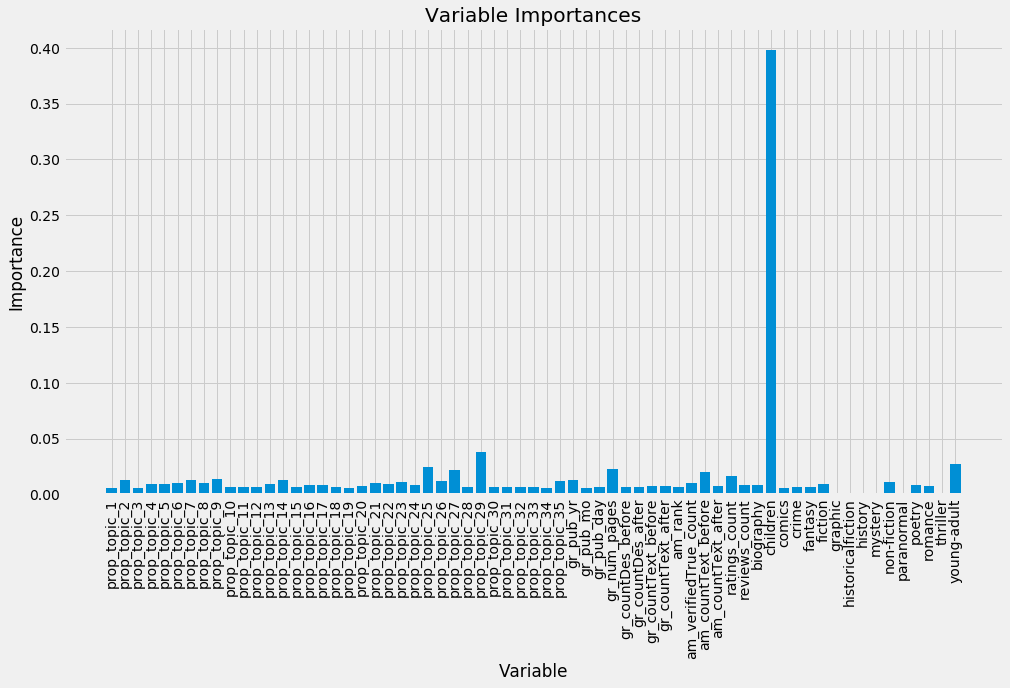

In [47]:
importances = list(model.feature_importances_)

# Set the style
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 8))
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances')
plt.show()

Verdict: Better than model w/o LDA. Not as good as RF w/ LDA mallet except for R2 Adjusted.

### XGB mallet w/ just Children

In [41]:
y = np.array(xgb_mallet['rating_diff'])
x = xgb_mallet.drop(['asin', 'rating_diff', 'graphic', 'historicalfiction', 'history', 'mystery', 'paranormal', 'thriller'], 
                    axis=1) 
features = list(x.columns)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=0)

# fit model no training data
model = xgb.XGBRegressor(eta=0.1, min_child_weight=10, tree_method='approx')
model.fit(x_train, y_train)

# make predictions for train data
y_pred = model.predict(x_train)
print('TRAIN DATA:')
print('Mean Absolute Error:', np.round(mean_absolute_error(y_train, y_pred),4))
print('Mean Squared Error:', np.round(mean_squared_error(y_train, y_pred),4))
print('Root Mean Squared Error:', np.round(np.sqrt(mean_squared_error(y_train, y_pred)),4))
r2 = model.score(x_train, y_train)
n = x_train.shape[0]
p = x_train.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('R2 Adjusted Score:', np.round(adjusted_r2,4))

print('----------------------------------')

# make predictions for test data
y_pred = model.predict(x_test)
print('TEST DATA:')
print('Mean Absolute Error:', np.round(mean_absolute_error(y_test, y_pred),4))
print('Mean Squared Error:', np.round(mean_squared_error(y_test, y_pred),4))
print('Root Mean Squared Error:', np.round(np.sqrt(mean_squared_error(y_test, y_pred)),4))
r2 = model.score(x_test, y_test)
n = x_test.shape[0]
p = x_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('R2 Adjusted Score:', np.round(adjusted_r2,4))

TRAIN DATA:
Mean Absolute Error: 0.1601
Mean Squared Error: 0.0427
Root Mean Squared Error: 0.2066
R2 Adjusted Score: 0.4407
----------------------------------
TEST DATA:
Mean Absolute Error: 0.1876
Mean Squared Error: 0.0588
Root Mean Squared Error: 0.2424
R2 Adjusted Score: 0.2254


### XGB mallet w/ null removed

In [42]:
xgb_mallet_2 = lda_mallet.drop(['gr_format', 'gr_description', 'gr_genres', 'am_format'], axis=1) 
xgb_mallet_2 = xgb_mallet_2.dropna()
xgb_mallet_2 = pd.merge(xgb_mallet_2, genres, how='left', on='asin')
xgb_mallet_2.isnull().sum()

asin            0
prop_topic_1    0
prop_topic_2    0
prop_topic_3    0
prop_topic_4    0
               ..
paranormal      0
poetry          0
romance         0
thriller        0
young-adult     0
Length: 67, dtype: int64

In [43]:
y = np.array(xgb_mallet_2['rating_diff'])
x = xgb_mallet_2.drop('asin', axis=1).drop('rating_diff', axis=1)
features = list(x.columns)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=0)

# fit model no training data
model = xgb.XGBRegressor(eta=0.1, min_child_weight=10, tree_method='approx')
model.fit(x_train, y_train)

# make predictions for train data
y_pred = model.predict(x_train)
print('TRAIN DATA:')
print('Mean Absolute Error:', np.round(mean_absolute_error(y_train, y_pred),4))
print('Mean Squared Error:', np.round(mean_squared_error(y_train, y_pred),4))
print('Root Mean Squared Error:', np.round(np.sqrt(mean_squared_error(y_train, y_pred)),4))
r2 = model.score(x_train, y_train)
n = x_train.shape[0]
p = x_train.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('R2 Adjusted Score:', np.round(adjusted_r2,4))

print('----------------------------------')

# make predictions for test data
y_pred = model.predict(x_test)
print('TEST DATA:')
print('Mean Absolute Error:', np.round(mean_absolute_error(y_test, y_pred),4))
print('Mean Squared Error:', np.round(mean_squared_error(y_test, y_pred),4))
print('Root Mean Squared Error:', np.round(np.sqrt(mean_squared_error(y_test, y_pred)),4))
r2 = model.score(x_test, y_test)
n = x_test.shape[0]
p = x_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('R2 Adjusted Score:', np.round(adjusted_r2,4))

TRAIN DATA:
Mean Absolute Error: 0.1568
Mean Squared Error: 0.0412
Root Mean Squared Error: 0.203
R2 Adjusted Score: 0.4614
----------------------------------
TEST DATA:
Mean Absolute Error: 0.1841
Mean Squared Error: 0.0566
Root Mean Squared Error: 0.2378
R2 Adjusted Score: 0.2317


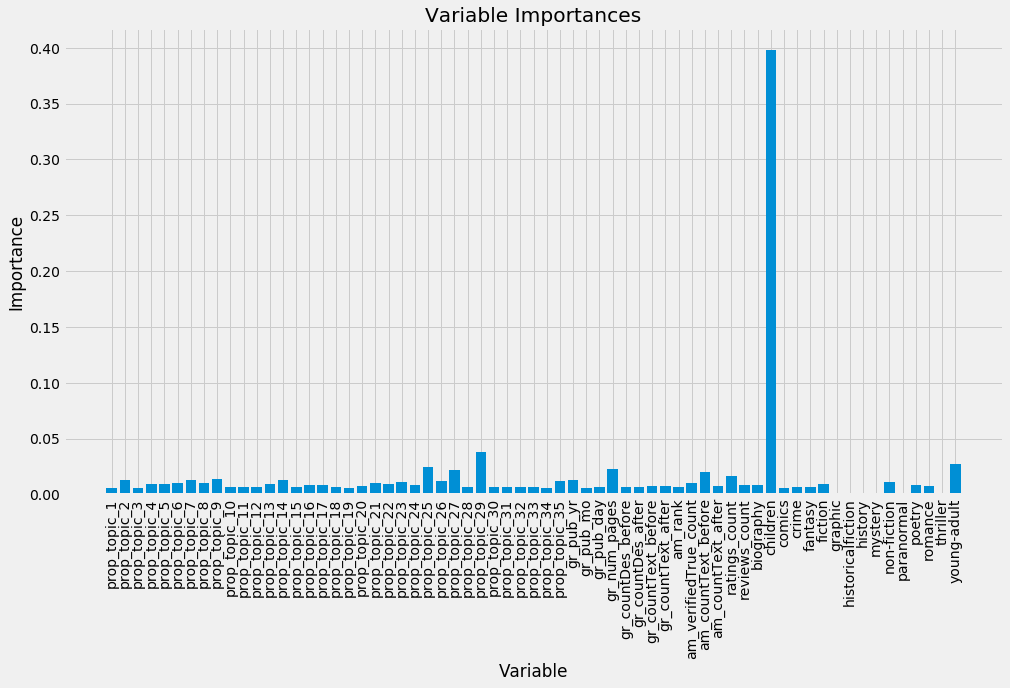

In [49]:
importances = list(model.feature_importances_)

# Set the style
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 8))
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, features, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances')
plt.show()

Verdict: better than the model w/o removing null

# Neural Network

In [50]:
nn_mallet = lda_mallet.drop(['gr_format', 'gr_description', 'gr_genres', 'am_format'], axis=1) 
nn_mallet = nn_mallet.dropna()
nn_mallet.isnull().sum()

asin                     0
prop_topic_1             0
prop_topic_2             0
prop_topic_3             0
prop_topic_4             0
prop_topic_5             0
prop_topic_6             0
prop_topic_7             0
prop_topic_8             0
prop_topic_9             0
prop_topic_10            0
prop_topic_11            0
prop_topic_12            0
prop_topic_13            0
prop_topic_14            0
prop_topic_15            0
prop_topic_16            0
prop_topic_17            0
prop_topic_18            0
prop_topic_19            0
prop_topic_20            0
prop_topic_21            0
prop_topic_22            0
prop_topic_23            0
prop_topic_24            0
prop_topic_25            0
prop_topic_26            0
prop_topic_27            0
prop_topic_28            0
prop_topic_29            0
prop_topic_30            0
prop_topic_31            0
prop_topic_32            0
prop_topic_33            0
prop_topic_34            0
prop_topic_35            0
gr_pub_yr                0
g

In [53]:
nn_mallet = pd.merge(nn_mallet, genres, how='left', on='asin')
nn_mallet.isnull().sum()

asin             0
prop_topic_1     0
prop_topic_2     0
prop_topic_3     0
prop_topic_4     0
                ..
paranormal_y     0
poetry_y         0
romance_y        0
thriller_y       0
young-adult_y    0
Length: 83, dtype: int64

In [54]:
y = np.array(nn_mallet['rating_diff'])
x = nn_mallet.drop('asin', axis=1).drop('rating_diff', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=0)
# normalize features
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
# fit model no training data
model = MLPRegressor(hidden_layer_sizes=(14,), solver='lbfgs', alpha=0.002, max_iter=500)
model.fit(x_train, y_train)

# make predictions for train data
y_pred = model.predict(x_train)
print('TRAIN DATA:')
print('Mean Absolute Error:', np.round(mean_absolute_error(y_train, y_pred),4))
print('Mean Squared Error:', np.round(mean_squared_error(y_train, y_pred),4))
print('Root Mean Squared Error:', np.round(np.sqrt(mean_squared_error(y_train, y_pred)),4))
r2 = model.score(x_train, y_train)
n = x_train.shape[0]
p = x_train.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('R2 Adjusted Score:', np.round(adjusted_r2,4))

print('----------------------------------')

# make predictions for test data
y_pred = model.predict(x_test)
print('TEST DATA:')
print('Mean Absolute Error:', np.round(mean_absolute_error(y_test, y_pred),4))
print('Mean Squared Error:', np.round(mean_squared_error(y_test, y_pred),4))
print('Root Mean Squared Error:', np.round(np.sqrt(mean_squared_error(y_test, y_pred)),4))
r2 = model.score(x_test, y_test)
n = x_test.shape[0]
p = x_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('R2 Adjusted Score:', np.round(adjusted_r2,4))

TRAIN DATA:
Mean Absolute Error: 0.1875
Mean Squared Error: 0.0583
Root Mean Squared Error: 0.2414
R2 Adjusted Score: 0.2379
----------------------------------
TEST DATA:
Mean Absolute Error: 0.1913
Mean Squared Error: 0.0608
Root Mean Squared Error: 0.2466
R2 Adjusted Score: 0.1722


C:\Users\Tien Nguyen\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Verdict: Improvement from the model w/o LDA

# Discussion

The models test performance from best to least in order are: Xgboost > RF > NN. <br/>
But the train/test prediction difference of the models from smallest to biggest in order are: NN > Xgboost > RF. <br/>
Best models overall: Xgboost & NN <br/>
Test out some weighted average ensembles and compare with individual models. Start w/ <br/>
1. Equal weights for all 3
2. Equal weights for just Xgboost & NN
3. Higher weights for Xgboost & NN (equal or one higher than the other) than RF

# Ensemble

### Equal weights for all 3

In [56]:
model1 = RandomForestRegressor(n_estimators = 1155, min_samples_split = 35, min_samples_leaf = 3, max_leaf_nodes = 7000,
                               max_features = 'auto', max_depth = 30, bootstrap = True, n_jobs=4)
model2 = xgb.XGBRegressor(eta=0.1, min_child_weight=10, tree_method='approx')
model3= MLPRegressor(hidden_layer_sizes=(14,), solver='lbfgs', alpha=0.002, max_iter=500)

y = np.array(nn_mallet['rating_diff'])
x = nn_mallet.drop('asin', axis=1).drop('rating_diff', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=0)

model1.fit(x_train, y_train)
model2.fit(x_train, y_train)

scaler = StandardScaler()
scaler.fit(x_train)
x_train_nn = scaler.transform(x_train)
x_test_nn = scaler.transform(x_test)

model3.fit(x_train_nn, y_train)

# make predictions for train data
model1_pred = np.array(model1.predict(x_train))
model2_pred = np.array(model2.predict(x_train))
model3_pred = np.array(model3.predict(x_train_nn))
y_pred = (model1_pred + model2_pred + model3_pred)/3
print('TRAIN DATA:')
print('Mean Absolute Error:', np.round(mean_absolute_error(y_train, y_pred),4))
print('Mean Squared Error:', np.round(mean_squared_error(y_train, y_pred),4))
print('Root Mean Squared Error:', np.round(np.sqrt(mean_squared_error(y_train, y_pred)),4))
r2 = r2_score(y_train, y_pred)
n = x_train.shape[0]
p = x_train.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('R2 Adjusted Score:', np.round(adjusted_r2,4))

print('----------------------------------')

# make predictions for test data
model1_pred = np.array(model1.predict(x_test))
model2_pred = np.array(model2.predict(x_test))
model3_pred = np.array(model3.predict(x_test_nn))
y_pred = (model1_pred + model2_pred + model3_pred)/3
print('TEST DATA:')
print('Mean Absolute Error:', np.round(mean_absolute_error(y_test, y_pred),4))
print('Mean Squared Error:', np.round(mean_squared_error(y_test, y_pred),4))
print('Root Mean Squared Error:', np.round(np.sqrt(mean_squared_error(y_test, y_pred)),4))
r2 = r2_score(y_test, y_pred)
n = x_test.shape[0]
p = x_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('R2 Adjusted Score:', np.round(adjusted_r2,4))

C:\Users\Tien Nguyen\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


TRAIN DATA:
Mean Absolute Error: 0.1573
Mean Squared Error: 0.0416
Root Mean Squared Error: 0.204
R2 Adjusted Score: 0.4555
----------------------------------
TEST DATA:
Mean Absolute Error: 0.1837
Mean Squared Error: 0.0565
Root Mean Squared Error: 0.2377
R2 Adjusted Score: 0.231


### Equal weights w/ just XGB & NN

In [57]:
# make predictions for train data
model2_pred = np.array(model2.predict(x_train))
model3_pred = np.array(model3.predict(x_train_nn))
y_pred = (model2_pred + model3_pred)/2
print('TRAIN DATA:')
print('Mean Absolute Error:', np.round(mean_absolute_error(y_train, y_pred),4))
print('Mean Squared Error:', np.round(mean_squared_error(y_train, y_pred),4))
print('Root Mean Squared Error:', np.round(np.sqrt(mean_squared_error(y_train, y_pred)),4))
n = x_train.shape[0]
p = x_train.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('R2 Adjusted Score:', np.round(adjusted_r2,4))

print('----------------------------------')

# make predictions for test data
model2_pred = np.array(model2.predict(x_test))
model3_pred = np.array(model3.predict(x_test_nn))
y_pred = (model2_pred + model3_pred)/2
print('TEST DATA:')
print('Mean Absolute Error:', np.round(mean_absolute_error(y_test, y_pred),4))
print('Mean Squared Error:', np.round(mean_squared_error(y_test, y_pred),4))
print('Root Mean Squared Error:', np.round(np.sqrt(mean_squared_error(y_test, y_pred)),4))
r2 = r2_score(y_test, y_pred)
n = x_test.shape[0]
p = x_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('R2 Adjusted Score:', np.round(adjusted_r2,4))

TRAIN DATA:
Mean Absolute Error: 0.1694
Mean Squared Error: 0.0479
Root Mean Squared Error: 0.219
R2 Adjusted Score: 0.2362
----------------------------------
TEST DATA:
Mean Absolute Error: 0.1842
Mean Squared Error: 0.0569
Root Mean Squared Error: 0.2386
R2 Adjusted Score: 0.2253


### Higher but equal weights for XGB & NN than RF

In [58]:
# make predictions for train data
model1_pred = np.array(model1.predict(x_train))
model2_pred = np.array(model2.predict(x_train))
model3_pred = np.array(model3.predict(x_train_nn))
y_pred = (model1_pred + (2*model2_pred) + (2*model3_pred))/5
print('TRAIN DATA:')
print('Mean Absolute Error:', np.round(mean_absolute_error(y_train, y_pred),4))
print('Mean Squared Error:', np.round(mean_squared_error(y_train, y_pred),4))
print('Root Mean Squared Error:', np.round(np.sqrt(mean_squared_error(y_train, y_pred)),4))
r2 = r2_score(y_train, y_pred)
n = x_train.shape[0]
p = x_train.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('R2 Adjusted Score:', np.round(adjusted_r2,4))

print('----------------------------------')

# make predictions for test data
model1_pred = np.array(model1.predict(x_test))
model2_pred = np.array(model2.predict(x_test))
model3_pred = np.array(model3.predict(x_test_nn))
y_pred = (model1_pred + (2*model2_pred) + (2*model3_pred))/5
print('TEST DATA:')
print('Mean Absolute Error:', np.round(mean_absolute_error(y_test, y_pred),4))
print('Mean Squared Error:', np.round(mean_squared_error(y_test, y_pred),4))
print('Root Mean Squared Error:', np.round(np.sqrt(mean_squared_error(y_test, y_pred)),4))
r2 = r2_score(y_test, y_pred)
n = x_test.shape[0]
p = x_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('R2 Adjusted Score:', np.round(adjusted_r2,4))

TRAIN DATA:
Mean Absolute Error: 0.1621
Mean Squared Error: 0.0441
Root Mean Squared Error: 0.2099
R2 Adjusted Score: 0.4238
----------------------------------
TEST DATA:
Mean Absolute Error: 0.1837
Mean Squared Error: 0.0566
Root Mean Squared Error: 0.2379
R2 Adjusted Score: 0.2297


### XGB > RF > NN

In [59]:
# make predictions for train data
model1_pred = np.array(model1.predict(x_train))
model2_pred = np.array(model2.predict(x_train))
model3_pred = np.array(model3.predict(x_train_nn))
y_pred = ((2*model1_pred) + (3*model2_pred) + model3_pred)/6
print('TRAIN DATA:')
print('Mean Absolute Error:', np.round(mean_absolute_error(y_train, y_pred),4))
print('Mean Squared Error:', np.round(mean_squared_error(y_train, y_pred),4))
print('Root Mean Squared Error:', np.round(np.sqrt(mean_squared_error(y_train, y_pred)),4))
r2 = r2_score(y_train, y_pred)
n = x_train.shape[0]
p = x_train.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('R2 Adjusted Score:', np.round(adjusted_r2,4))

print('----------------------------------')

# make predictions for test data
model1_pred = np.array(model1.predict(x_test))
model2_pred = np.array(model2.predict(x_test))
model3_pred = np.array(model3.predict(x_test_nn))
y_pred = ((2*model1_pred) + (3*model2_pred) + model3_pred)/6
print('TEST DATA:')
print('Mean Absolute Error:', np.round(mean_absolute_error(y_test, y_pred),4))
print('Mean Squared Error:', np.round(mean_squared_error(y_test, y_pred),4))
print('Root Mean Squared Error:', np.round(np.sqrt(mean_squared_error(y_test, y_pred)),4))
r2 = r2_score(y_test, y_pred)
n = x_test.shape[0]
p = x_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('R2 Adjusted Score:', np.round(adjusted_r2,4))

TRAIN DATA:
Mean Absolute Error: 0.1528
Mean Squared Error: 0.0393
Root Mean Squared Error: 0.1982
R2 Adjusted Score: 0.4861
----------------------------------
TEST DATA:
Mean Absolute Error: 0.1834
Mean Squared Error: 0.0562
Root Mean Squared Error: 0.2371
R2 Adjusted Score: 0.2352


### XGB > NN > RF

In [60]:
# make predictions for train data
model1_pred = np.array(model1.predict(x_train))
model2_pred = np.array(model2.predict(x_train))
model3_pred = np.array(model3.predict(x_train_nn))
y_pred = (model1_pred + (3*model2_pred) + (2*model3_pred))/6
print('TRAIN DATA:')
print('Mean Absolute Error:', np.round(mean_absolute_error(y_train, y_pred),4))
print('Mean Squared Error:', np.round(mean_squared_error(y_train, y_pred),4))
print('Root Mean Squared Error:', np.round(np.sqrt(mean_squared_error(y_train, y_pred)),4))
r2 = r2_score(y_train, y_pred)
n = x_train.shape[0]
p = x_train.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('R2 Adjusted Score:', np.round(adjusted_r2,4))

print('----------------------------------')

# make predictions for test data
model1_pred = np.array(model1.predict(x_test))
model2_pred = np.array(model2.predict(x_test))
model3_pred = np.array(model3.predict(x_test_nn))
y_pred = (model1_pred + (3*model2_pred) + (2*model3_pred))/6
print('TEST DATA:')
print('Mean Absolute Error:', np.round(mean_absolute_error(y_test, y_pred),4))
print('Mean Squared Error:', np.round(mean_squared_error(y_test, y_pred),4))
print('Root Mean Squared Error:', np.round(np.sqrt(mean_squared_error(y_test, y_pred)),4))
r2 = r2_score(y_test, y_pred)
n = x_test.shape[0]
p = x_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('R2 Adjusted Score:', np.round(adjusted_r2,4))

TRAIN DATA:
Mean Absolute Error: 0.1608
Mean Squared Error: 0.0434
Root Mean Squared Error: 0.2083
R2 Adjusted Score: 0.4326
----------------------------------
TEST DATA:
Mean Absolute Error: 0.1834
Mean Squared Error: 0.0564
Root Mean Squared Error: 0.2375
R2 Adjusted Score: 0.2326


### NN > XGB > RF

In [61]:
# make predictions for train data
model1_pred = np.array(model1.predict(x_train))
model2_pred = np.array(model2.predict(x_train))
model3_pred = np.array(model3.predict(x_train_nn))
y_pred = (model1_pred + (2*model2_pred) + (3*model3_pred))/6
print('TRAIN DATA:')
print('Mean Absolute Error:', np.round(mean_absolute_error(y_train, y_pred),4))
print('Mean Squared Error:', np.round(mean_squared_error(y_train, y_pred),4))
print('Root Mean Squared Error:', np.round(np.sqrt(mean_squared_error(y_train, y_pred)),4))
r2 = r2_score(y_train, y_pred)
n = x_train.shape[0]
p = x_train.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('R2 Adjusted Score:', np.round(adjusted_r2,4))

print('----------------------------------')

# make predictions for test data
model1_pred = np.array(model1.predict(x_test))
model2_pred = np.array(model2.predict(x_test))
model3_pred = np.array(model3.predict(x_test_nn))
y_pred = (model1_pred + (2*model2_pred) + (3*model3_pred))/6

r2 = r2_score(y_test, y_pred)
n = x_test.shape[0]
p = x_test.shape[1]
print('TEST DATA:')
print('Mean Absolute Error:', np.round(mean_absolute_error(y_test, y_pred),4))
print('Mean Squared Error:', np.round(mean_squared_error(y_test, y_pred),4))
print('Root Mean Squared Error:', np.round(np.sqrt(mean_squared_error(y_test, y_pred)),4))
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('R2 Adjusted Score:', np.round(adjusted_r2,4))

TRAIN DATA:
Mean Absolute Error: 0.1659
Mean Squared Error: 0.0461
Root Mean Squared Error: 0.2147
R2 Adjusted Score: 0.3972
----------------------------------
TEST DATA:
Mean Absolute Error: 0.1843
Mean Squared Error: 0.057
Root Mean Squared Error: 0.2387
R2 Adjusted Score: 0.2245


### XGB > NN

In [62]:
# make predictions for train data
model2_pred = np.array(model2.predict(x_train))
model3_pred = np.array(model3.predict(x_train_nn))
y_pred = ((2*model2_pred) + model3_pred)/2
print('TRAIN DATA:')
print('Mean Absolute Error:', np.round(mean_absolute_error(y_train, y_pred),4))
print('Mean Squared Error:', np.round(mean_squared_error(y_train, y_pred),4))
print('Root Mean Squared Error:', np.round(np.sqrt(mean_squared_error(y_train, y_pred)),4))
r2 = r2_score(y_train, y_pred)
n = x_train.shape[0]
p = x_train.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('R2 Adjusted Score:', np.round(adjusted_r2,4))

print('----------------------------------')

# make predictions for test data
model2_pred = np.array(model2.predict(x_test))
model3_pred = np.array(model3.predict(x_test_nn))
y_pred = ((2*model2_pred) + model3_pred)/2
print('TEST DATA:')
print('Mean Absolute Error:', np.round(mean_absolute_error(y_test, y_pred),4))
print('Mean Squared Error:', np.round(mean_squared_error(y_test, y_pred),4))
print('Root Mean Squared Error:', np.round(np.sqrt(mean_squared_error(y_test, y_pred)),4))
r2 = r2_score(y_test, y_pred)
n = x_test.shape[0]
p = x_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('R2 Adjusted Score:', np.round(adjusted_r2,4))

TRAIN DATA:
Mean Absolute Error: 0.2305
Mean Squared Error: 0.0814
Root Mean Squared Error: 0.2854
R2 Adjusted Score: -0.0651
----------------------------------
TEST DATA:
Mean Absolute Error: 0.2467
Mean Squared Error: 0.0967
Root Mean Squared Error: 0.311
R2 Adjusted Score: -0.3165


### NN > XGB

In [63]:
# make predictions for train data
model2_pred = np.array(model2.predict(x_train))
model3_pred = np.array(model3.predict(x_train_nn))
y_pred = (model2_pred + (2*model3_pred))/2
print('TRAIN DATA:')
print('Mean Absolute Error:', np.round(mean_absolute_error(y_train, y_pred),4))
print('Mean Squared Error:', np.round(mean_squared_error(y_train, y_pred),4))
print('Root Mean Squared Error:', np.round(np.sqrt(mean_squared_error(y_train, y_pred)),4))
r2 = r2_score(y_train, y_pred)
n = x_train.shape[0]
p = x_train.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('R2 Adjusted Score:', np.round(adjusted_r2,4))

print('----------------------------------')

# make predictions for test data
model2_pred = np.array(model2.predict(x_test))
model3_pred = np.array(model3.predict(x_test_nn))
y_pred = (model2_pred + (2*model3_pred))/2
print('TEST DATA:')
print('Mean Absolute Error:', np.round(mean_absolute_error(y_test, y_pred),4))
print('Mean Squared Error:', np.round(mean_squared_error(y_test, y_pred),4))
print('Root Mean Squared Error:', np.round(np.sqrt(mean_squared_error(y_test, y_pred)),4))
r2 = r2_score(y_test, y_pred)
n = x_test.shape[0]
p = x_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('R2 Adjusted Score:', np.round(adjusted_r2,4))

TRAIN DATA:
Mean Absolute Error: 0.2401
Mean Squared Error: 0.0898
Root Mean Squared Error: 0.2997
R2 Adjusted Score: -0.1745
----------------------------------
TEST DATA:
Mean Absolute Error: 0.2497
Mean Squared Error: 0.0994
Root Mean Squared Error: 0.3153
R2 Adjusted Score: -0.3526


In [49]:
"""
### NOTE: RANKED FROM WORST TO BEST TEST PERFORMANCE

1.ENSEMBLE - NN > XGB:
    TRAIN DATA:
    Mean Absolute Error: 0.2401
    Mean Squared Error: 0.0898
    Root Mean Squared Error: 0.2997
    R2 Adjusted Score: -0.1745
    ----------------------------------
    TEST DATA:
    Mean Absolute Error: 0.2497
    Mean Squared Error: 0.0994
    Root Mean Squared Error: 0.3153
    R2 Adjusted Score: -0.3526

2.ENSEMBLE - XGB > NN:
    TRAIN DATA:
    Mean Absolute Error: 0.2305
    Mean Squared Error: 0.0814
    Root Mean Squared Error: 0.2854
    R2 Adjusted Score: -0.0651
    ----------------------------------
    TEST DATA:
    Mean Absolute Error: 0.2467
    Mean Squared Error: 0.0967
    Root Mean Squared Error: 0.311
    R2 Adjusted Score: -0.3165

3.NN MALLET
    TRAIN DATA:
    Mean Absolute Error: 0.1875
    Mean Squared Error: 0.0583
    Root Mean Squared Error: 0.2414
    R2 Adjusted Score: 0.2379
    ----------------------------------
    TEST DATA:
    Mean Absolute Error: 0.1913
    Mean Squared Error: 0.0608
    Root Mean Squared Error: 0.2466
    R2 Adjusted Score: 0.1722

4.XGB MALLET
    TRAIN DATA:
    Mean Absolute Error: 0.1592
    Mean Squared Error: 0.0422
    Root Mean Squared Error: 0.2054
    R2 Adjusted Score: 0.4472
    ----------------------------------
    TEST DATA:
    Mean Absolute Error: 0.1872
    Mean Squared Error: 0.0584
    Root Mean Squared Error: 0.2416
    R2 Adjusted Score: 0.229

5.RF MALLET
    TRAIN DATA:
    Mean Absolute Error: 0.1357
    Mean Squared Error: 0.0315
    Root Mean Squared Error: 0.1775
    R2 Adjusted Score: 0.5883
    ----------------------------------
    TEST DATA:
    Mean Absolute Error: 0.1859
    Mean Squared Error: 0.0574
    Root Mean Squared Error: 0.2397
    R2 Adjusted Score: 0.2199

6.ENSEMBLE - NN > XGB > RF:
    TRAIN DATA:
    Mean Absolute Error: 0.1659
    Mean Squared Error: 0.0461
    Root Mean Squared Error: 0.2147
    R2 Adjusted Score: 0.3972
    ----------------------------------
    TEST DATA:
    Mean Absolute Error: 0.1843
    Mean Squared Error: 0.057
    Root Mean Squared Error: 0.2387
    R2 Adjusted Score: 0.2245

7.ENSEMBLE - EQUAL WEIGHTS FOR JUST XGB & NN:
    TRAIN DATA:
    Mean Absolute Error: 0.1694
    Mean Squared Error: 0.0479
    Root Mean Squared Error: 0.219
    R2 Adjusted Score: 0.2362
    ----------------------------------
    TEST DATA:
    Mean Absolute Error: 0.1842
    Mean Squared Error: 0.0569
    Root Mean Squared Error: 0.2386
    R2 Adjusted Score: 0.2253

8.ENSEMBLE - HIGHER BUT EQUAL WEIGHTS FOR XGB & NN THAN RF:
    TRAIN DATA:
    Mean Absolute Error: 0.1621
    Mean Squared Error: 0.0441
    Root Mean Squared Error: 0.2099
    R2 Adjusted Score: 0.4238
    ----------------------------------
    TEST DATA:
    Mean Absolute Error: 0.1837
    Mean Squared Error: 0.0566
    Root Mean Squared Error: 0.2379
    R2 Adjusted Score: 0.2297

9.XGB MALLET NO NULLS
    TRAIN DATA:
    Mean Absolute Error: 0.1568
    Mean Squared Error: 0.0412
    Root Mean Squared Error: 0.203
    R2 Adjusted Score: 0.4614
    ----------------------------------
    TEST DATA:
    Mean Absolute Error: 0.1841
    Mean Squared Error: 0.0566
    Root Mean Squared Error: 0.2378
    R2 Adjusted Score: 0.2317

10.ENSEMBLE - EQUAL WEIGHTS FOR ALL 3:
    TRAIN DATA:
    Mean Absolute Error: 0.1573
    Mean Squared Error: 0.0416
    Root Mean Squared Error: 0.204
    R2 Adjusted Score: 0.4555
    ----------------------------------
    TEST DATA:
    Mean Absolute Error: 0.1837
    Mean Squared Error: 0.0565
    Root Mean Squared Error: 0.2377
    R2 Adjusted Score: 0.231
    
11.ENSEMBLE - XGB > NN > RF:
    TRAIN DATA:
    Mean Absolute Error: 0.1608
    Mean Squared Error: 0.0434
    Root Mean Squared Error: 0.2083
    R2 Adjusted Score: 0.4326
    ----------------------------------
    TEST DATA:
    Mean Absolute Error: 0.1834
    Mean Squared Error: 0.0564
    Root Mean Squared Error: 0.2375
    R2 Adjusted Score: 0.2326

12.ENSEMBLE - XGB > RF > NN:
    TRAIN DATA:
    Mean Absolute Error: 0.1528
    Mean Squared Error: 0.0393
    Root Mean Squared Error: 0.1982
    R2 Adjusted Score: 0.4861
    ----------------------------------
    TEST DATA:
    Mean Absolute Error: 0.1834
    Mean Squared Error: 0.0562
    Root Mean Squared Error: 0.2371
    R2 Adjusted Score: 0.2352
    

""";

So far, The ensemble w/ XGB > RF > NN has the lowest test errors and the highest test R2 Adjusted Score.  
Let's tweak the weights.

### 43% * RF + 45% * XgB + 12% * NN 

In [64]:
# make predictions for train data
model1_pred = np.array(model1.predict(x_train))
model2_pred = np.array(model2.predict(x_train))
model3_pred = np.array(model3.predict(x_train_nn))
y_pred = ((43*model1_pred) + (45*model2_pred) + (12*model3_pred))/100
print('TRAIN DATA:')
print('Mean Absolute Error:', np.round(mean_absolute_error(y_train, y_pred),4))
print('Mean Squared Error:', np.round(mean_squared_error(y_train, y_pred),4))
print('Root Mean Squared Error:', np.round(np.sqrt(mean_squared_error(y_train, y_pred)),4))
r2 = r2_score(y_train, y_pred)
n = x_train.shape[0]
p = x_train.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('R2 Adjusted Score:', np.round(adjusted_r2,4))

print('----------------------------------')

# make predictions for test data
model1_pred = np.array(model1.predict(x_test))
model2_pred = np.array(model2.predict(x_test))
model3_pred = np.array(model3.predict(x_test_nn))
y_pred = ((43*model1_pred) + (45*model2_pred) + (12*model3_pred))/100
print('TEST DATA:')
print('Mean Absolute Error:', np.round(mean_absolute_error(y_test, y_pred),4))
print('Mean Squared Error:', np.round(mean_squared_error(y_test, y_pred),4))
print('Root Mean Squared Error:', np.round(np.sqrt(mean_squared_error(y_test, y_pred)),4))
r2 = r2_score(y_test, y_pred)
n = x_test.shape[0]
p = x_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('R2 Adjusted Score:', np.round(adjusted_r2,4))

TRAIN DATA:
Mean Absolute Error: 0.1496
Mean Squared Error: 0.0377
Root Mean Squared Error: 0.1943
R2 Adjusted Score: 0.5065
----------------------------------
TEST DATA:
Mean Absolute Error: 0.1836
Mean Squared Error: 0.0562
Root Mean Squared Error: 0.2372
R2 Adjusted Score: 0.2346


### 30% * RF + 60% * XgB + 10% * NN 

In [74]:
# make predictions for train data
model1_pred = np.array(model1.predict(x_train))
model2_pred = np.array(model2.predict(x_train))
model3_pred = np.array(model3.predict(x_train_nn))
y_pred = ((30*model1_pred) + (60*model2_pred) + (10*model3_pred))/100
print('TRAIN DATA:')
print('Mean Absolute Error:', np.round(mean_absolute_error(y_train, y_pred),4))
print('Mean Squared Error:', np.round(mean_squared_error(y_train, y_pred),4))
print('Root Mean Squared Error:', np.round(np.sqrt(mean_squared_error(y_train, y_pred)),4))
r2 = r2_score(y_train, y_pred)
n = x_train.shape[0]
p = x_train.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('R2 Adjusted Score:', np.round(adjusted_r2,4))

print('----------------------------------')

# make predictions for test data
model1_pred = np.array(model1.predict(x_test))
model2_pred = np.array(model2.predict(x_test))
model3_pred = np.array(model3.predict(x_test_nn))
y_pred = ((30*model1_pred) + (60*model2_pred) + (10*model3_pred))/100
print('TEST DATA:')
print('Mean Absolute Error:', np.round(mean_absolute_error(y_test, y_pred),4))
print('Mean Squared Error:', np.round(mean_squared_error(y_test, y_pred),4))
print('Root Mean Squared Error:', np.round(np.sqrt(mean_squared_error(y_test, y_pred)),4))
r2 = r2_score(y_test, y_pred)
n = x_test.shape[0]
p = x_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('R2 Adjusted Score:', np.round(adjusted_r2,4))

TRAIN DATA:
Mean Absolute Error: 0.1519
Mean Squared Error: 0.0388
Root Mean Squared Error: 0.197
R2 Adjusted Score: 0.4922
----------------------------------
TEST DATA:
Mean Absolute Error: 0.1835
Mean Squared Error: 0.0562
Root Mean Squared Error: 0.237
R2 Adjusted Score: 0.2355


=> improve a little 

### 20% * RF + 70% * XgB + 10% * NN 

In [71]:
# make predictions for train data
model1_pred = np.array(model1.predict(x_train))
model2_pred = np.array(model2.predict(x_train))
model3_pred = np.array(model3.predict(x_train_nn))
y_pred = ((20*model1_pred) + (70*model2_pred) + (10*model3_pred))/100
print('TRAIN DATA:')
print('Mean Absolute Error:', np.round(mean_absolute_error(y_train, y_pred),4))
print('Mean Squared Error:', np.round(mean_squared_error(y_train, y_pred),4))
print('Root Mean Squared Error:', np.round(np.sqrt(mean_squared_error(y_train, y_pred)),4))
r2 = r2_score(y_train, y_pred)
n = x_train.shape[0]
p = x_train.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('R2 Adjusted Score:', np.round(adjusted_r2,4))

print('----------------------------------')

# make predictions for test data
model1_pred = np.array(model1.predict(x_test))
model2_pred = np.array(model2.predict(x_test))
model3_pred = np.array(model3.predict(x_test_nn))
y_pred = ((20*model1_pred) + (70*model2_pred) + (10*model3_pred))/100
print('TEST DATA:')
print('Mean Absolute Error:', np.round(mean_absolute_error(y_test, y_pred),4))
print('Mean Squared Error:', np.round(mean_squared_error(y_test, y_pred),4))
print('Root Mean Squared Error:', np.round(np.sqrt(mean_squared_error(y_test, y_pred)),4))
r2 = r2_score(y_test, y_pred)
n = x_test.shape[0]
p = x_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('R2 Adjusted Score:', np.round(adjusted_r2,4))

TRAIN DATA:
Mean Absolute Error: 0.1542
Mean Squared Error: 0.0399
Root Mean Squared Error: 0.1998
R2 Adjusted Score: 0.4779
----------------------------------
TEST DATA:
Mean Absolute Error: 0.1834
Mean Squared Error: 0.0562
Root Mean Squared Error: 0.237
R2 Adjusted Score: 0.2353


*********************************************************************
=> The best model with the formula: 30% * RF + 60% * XgB + 10% * NN
*********************************************************************